In [1]:
! . .venv/bin/activate
! sstat -j $SLURM_JOB_ID 

JobID         MaxVMSize  MaxVMSizeNode  MaxVMSizeTask  AveVMSize     MaxRSS MaxRSSNode MaxRSSTask     AveRSS MaxPages MaxPagesNode   MaxPagesTask   AvePages     MinCPU MinCPUNode MinCPUTask     AveCPU   NTasks AveCPUFreq ReqCPUFreqMin ReqCPUFreqMax ReqCPUFreqGov ConsumedEnergy  MaxDiskRead MaxDiskReadNode MaxDiskReadTask  AveDiskRead MaxDiskWrite MaxDiskWriteNode MaxDiskWriteTask AveDiskWrite TRESUsageInAve TRESUsageInMax TRESUsageInMaxNode TRESUsageInMaxTask TRESUsageInMin TRESUsageInMinNode TRESUsageInMinTask TRESUsageInTot TRESUsageOutAve TRESUsageOutMax TRESUsageOutMaxNode TRESUsageOutMaxTask TRESUsageOutMin TRESUsageOutMinNode TRESUsageOutMinTask TRESUsageOutTot 
------------ ---------- -------------- -------------- ---------- ---------- ---------- ---------- ---------- -------- ------------ -------------- ---------- ---------- ---------- ---------- ---------- -------- ---------- ------------- ------------- ------------- -------------- ------------ --------------- --------------- 

# Load the data 
### Get data from running all of data_analysis/create_dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the data from model_data 
version = 'v2'
train = pd.read_csv(f'model_data/{version}/train.csv')
val = pd.read_csv(f'model_data/{version}/val.csv')
test = pd.read_csv(f'model_data/{version}/test.csv')

# Split the data into X and y
x_train = train.drop(columns=['causedPressure'])
y_train = train['causedPressure']

x_val = val.drop(columns=['causedPressure'])
y_val = val['causedPressure']

x_test = test.drop(columns=['causedPressure'])
y_test = test['causedPressure']

#print train cols
print(x_train.columns)

Index(['formation_2-Man', 'formation_Bracket', 'formation_Cover 6-Left',
       'formation_Cover-0', 'formation_Cover-1', 'formation_Cover-1 Double',
       'formation_Cover-2', 'formation_Cover-3',
       'formation_Cover-3 Cloud Left', 'formation_Cover-3 Cloud Right',
       'formation_Cover-3 Double Cloud', 'formation_Cover-3 Seam',
       'formation_Cover-6 Right', 'formation_Goal Line',
       'formation_Miscellaneous', 'formation_Prevent', 'formation_Quarters',
       'formation_Red Zone', 'C', 'CB', 'DE', 'DT', 'FS', 'G', 'ILB', 'NT',
       'QB', 'RB', 'SS', 'T', 'TE', 'WR', 'FB', 'OLB', 'MLB', 'DB', 'LB',
       'quarter', 'down', 'yardsToGo', 'inMotionAtBallSnap',
       'formation_SHOTGUN'],
      dtype='object')


# XGBoost model

In [5]:
model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',  
    early_stopping_rounds=10

)

model.fit(
    x_train,
    y_train,
    eval_set=[(x_val, y_val)],
    verbose=True
)

y_pred = model.predict(x_test)

[0]	validation_0-logloss:0.68269
[1]	validation_0-logloss:0.67707
[2]	validation_0-logloss:0.67316
[3]	validation_0-logloss:0.67161
[4]	validation_0-logloss:0.67156
[5]	validation_0-logloss:0.67316
[6]	validation_0-logloss:0.67323
[7]	validation_0-logloss:0.67422
[8]	validation_0-logloss:0.67577
[9]	validation_0-logloss:0.67508
[10]	validation_0-logloss:0.67590
[11]	validation_0-logloss:0.67603
[12]	validation_0-logloss:0.67772
[13]	validation_0-logloss:0.67800


/blue/hoover-sai/NFL_Big_Data_Bowl_2025/team1/aaron_dir/big-data-bowl/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:56:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Train Accuracy
### Dummy Model (guesses no pressure everytime) accuracy is 50%
### Goal: Beat Dummy Model

In [6]:
print(f"train accuracy = {accuracy_score(y_train, model.predict(x_train))}")

train accuracy = 0.6444382955174323


# Test Metrics
### Dummy Model (guesses no pressure everytime) accuracy is 70%
### Good weigthed average f1 score is > .70

In [7]:
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       890
           1       0.40      0.47      0.43       387

    accuracy                           0.63      1277
   macro avg       0.58      0.58      0.58      1277
weighted avg       0.65      0.63      0.64      1277



Perfect confusion matrix for comparison:
[[890   0]
 [  0 387]]


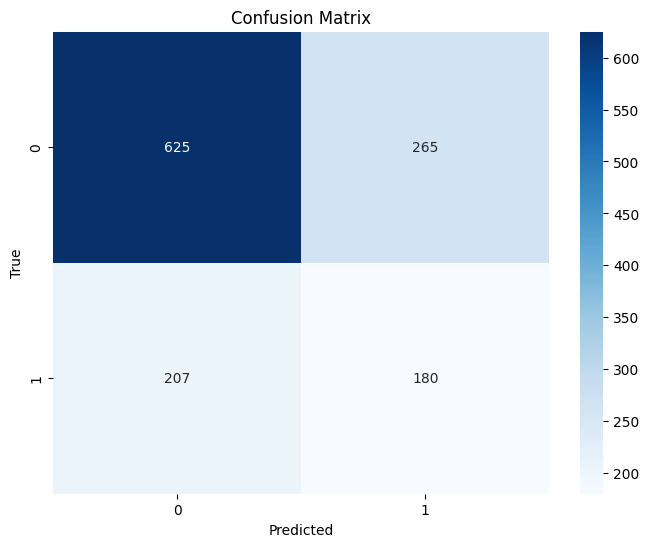

In [8]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Perfect confusion matrix for comparison:")
print(confusion_matrix(y_test, y_test))

# Optional: Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Hyperparamater Tuning

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/blue/hoover-sai/NFL_Big_Data_Bowl_2025/team1/aaron_dir/big-data-bowl/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:56:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/blue/hoover-sai/NFL_Big_Data_Bowl_2025/team1/aaron_dir/big-data-bowl/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:56:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/blue/hoover-sai/NFL_Big_Data_Bowl_2025/team1/aaron_dir/big-data-bowl/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:56:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/blue/hoover-sai/NFL_Big_Data_Bowl_2025/team1/aaron_dir/big-data-bowl/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:56:26] WARNING: /workspace

/blue/hoover-sai/NFL_Big_Data_Bowl_2025/team1/aaron_dir/big-data-bowl/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:56:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/blue/hoover-sai/NFL_Big_Data_Bowl_2025/team1/aaron_dir/big-data-bowl/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:56:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/blue/hoover-sai/NFL_Big_Data_Bowl_2025/team1/aaron_dir/big-data-bowl/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:56:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/blue/hoover-sai/NFL_Big_Data_Bowl_2025/team1/aaron_dir/big-data-bowl/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:56:26] WARNING: /workspace

Best parameters found:  {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 10, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.5, 'gamma': 1, 'colsample_bytree': 0.8}
Best CV accuracy:  0.551745219944583
Validation Accuracy with tuned model: 0.6461
Test Accuracy with tuned model: 0.6351
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       890
           1       0.40      0.43      0.42       387

    accuracy                           0.64      1277
   macro avg       0.58      0.58      0.58      1277
weighted avg       0.64      0.64      0.64      1277

Confusion Matrix:
[[643 247]
 [219 168]]


/blue/hoover-sai/NFL_Big_Data_Bowl_2025/team1/aaron_dir/big-data-bowl/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:56:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


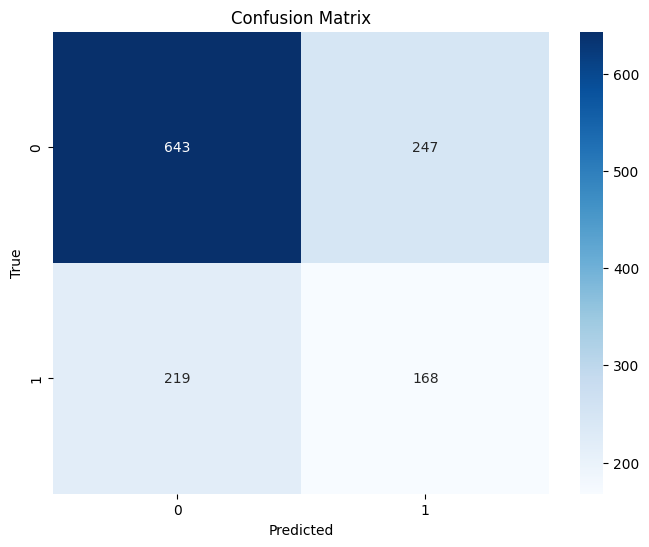

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# 1. Define a parameter grid for XGBoost hyperparameters
param_dist = {
    "n_estimators": [50, 100, 200, 300, 400, 500],  # More options for number of trees
    "max_depth": [3, 4, 5, 6, 8, 10, 12],           # Wider range of tree depths
    "learning_rate": [0.5, 0.1, 0.01, 0.001, 0.0001],  # Extended learning rates
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],    # Finer granularity for subsample
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # More options for feature sampling
    "min_child_weight": [1, 2, 3, 4, 5, 10],        # Wider range for regularization
    "gamma": [0, 0.1, 0.3, 0.5, 1, 2],              # Add higher gamma values
    "reg_alpha": [0, 0.01, 0.1, 1, 10, 100],        # Wider range for L1 regularization
    "reg_lambda": [0, 0.01, 0.1, 1, 10, 100]        # Wider range for L2 regularization
}

# 2. Initialize an XGBoost classifier
xgb_clf = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 3. Instantiate the RandomizedSearchCV
#    n_iter: number of random parameter settings to try
#    cv: number of folds in cross-validation
#    scoring: metric used for selection
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,                  # Adjust to your preference
    scoring='accuracy',         # Could be 'f1', 'roc_auc', etc. depending on the problem
    cv=3,                       # K-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1                   # Use all available cores
)

# 4. Fit the RandomizedSearchCV on your training set
random_search.fit(x_train, y_train)

# 5. Check best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best CV accuracy: ", random_search.best_score_)

# 6. Use the best_estimator_ to predict on validation/test set
best_model = random_search.best_estimator_

# If you have a separate validation set
y_val_pred = best_model.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with tuned model: {val_accuracy:.4f}")

# 7. Evaluate on test set
y_test_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with tuned model: {test_accuracy:.4f}")

print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Print the raw confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [10]:
# Get feature importance
importance = best_model.get_booster().get_score(importance_type='gain')

# Sort features by importance
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Print sorted feature importance
print("Feature Importance (sorted by gain):")
for feature, score in sorted_importance:
    print(f"{feature}: {score}")


Feature Importance (sorted by gain):
down: 17.75798225402832
formation_Cover-2: 5.581023216247559
FS: 3.562408447265625
formation_Cover-1 Double: 3.336963653564453
CB: 3.2822329998016357
OLB: 3.102947235107422
formation_Cover-0: 2.9633967876434326
formation_Red Zone: 2.9314041137695312
yardsToGo: 2.530982255935669
FB: 2.3931827545166016
DE: 2.367755889892578
formation_2-Man: 2.276430130004883
DT: 2.131113052368164
formation_Cover 6-Left: 2.067962169647217
quarter: 1.924669861793518
C: 1.7364177703857422
NT: 1.658214807510376
MLB: 1.6097004413604736
G: 1.5256049633026123
